## A Toy Example

Pretend we are studying the motion of the physicist’s ideal spring. 

This system consists of a ball of mass $m$ attached to a massless, frictionless spring. 

The ball is released a small distance away from equilibrium (i.e. the spring is stretched). 

Because the spring is ideal, it oscillates indefinitely along the $x$-axis about its equilibrium at a set frequency.

![](https://ccrma.stanford.edu/~jos/Laplace/img60.png)

This simple example is a canonical problem in classical mechanics. 

This is a standard problem in physics in which the force on the mass along the $x$ direction is a function of position. 

$$F = -kx$$

where $x$ is the position and $k$ is a constant associated with the spring itself. 

We also know that the force on an object is 

$$F = ma$$

where $m$ is the mass of the object and $a$ is its acceleration.

Thus, 

$$F = -kx = ma$$


We can further connect these by noting that when the position, $x$, is a function of time, the velocity, $v$ is the first derivative of the position. 

The velocity is how the position is changing with respect to time. 

We annotate this as

$$v(t) = \frac{d}{dt}x = \dot{x}$$

The acceleration $a$ is the first derivative of the velocity and the second derivative of the position. It is how the velocity is changing with respect to time. 

We annotate this as


$$a(t) = \frac{d^2}{dt^2}x = \ddot{x}$$

Therefore,

$$-kx = m\ddot{x}$$

or

$$\ddot{x} +\frac{k}{m}x = 0$$

This is known as a **differential equation** and has the solution 

$$x(t) = x_o\cos (\omega t) + \frac{v_o}{\omega}\sin (\omega t)$$

where $\omega = \frac{k}{m}$.

### True Function

We use this equation to define a "true function". We imagine pulling the mass to the left and then letting it go. This is modeled by $x_0 = -2$, $v_0 = 0$. 

We have chosen an arbitrary $\omega=0.1$. Recall, that $\omega$ is a constant containing the mass of the weight and the constant of the spring. 

In [1]:
cd ..

/Users/joshuacook/src/src/PCA-tutorial


In [2]:
mkdir -p data

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
x_0 = -2
v_0 = 0
omega = .1
true_function = lambda t: x_0*np.cos(omega*t) + v_0/omega*np.sin(omega*t)

In order to model this in time, we define an arbitrary time vector.

In [5]:
tt = np.linspace(1,151,150)

#### What kind of object is `tt`? What is its dimension?

In [6]:
tt.shape

(150,)

Then, motion in a vacuum would look as 

In [7]:
xx = true_function(tt)

Text(0,0.5,'time')

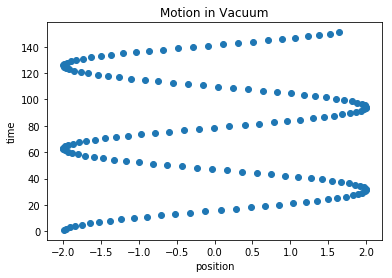

In [8]:
%matplotlib inline
plt.scatter(xx, tt)
plt.title('Motion in Vacuum')
plt.xlabel('position')
plt.ylabel('time')

### Environmental Noise

There would of course be some environmental noise. We model this using a simple noise function with a gaussian distribution.

In [9]:
env_noise = .2*np.random.rand(150)

(array([14., 15., 16., 15., 18., 13., 16., 14., 15., 14.]),
 array([0.00059762, 0.02044556, 0.04029351, 0.06014145, 0.07998939,
        0.09983733, 0.11968528, 0.13953322, 0.15938116, 0.17922911,
        0.19907705]),
 <a list of 10 Patch objects>)

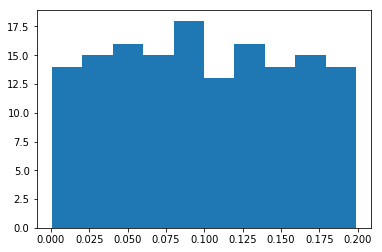

In [10]:
plt.hist(env_noise)

### Actual Motion

Then the actual motion would be the vacuum motion with the noise added.

In [11]:
xx_act = true_function(tt) + env_noise

Text(0,0.5,'time')

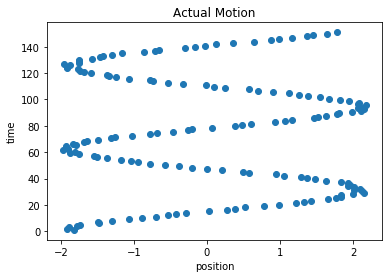

In [12]:
plt.scatter(xx_act, tt)
plt.title('Actual Motion')
plt.xlabel('position')
plt.ylabel('time')

### Modeling Experimental Data Collection

In the subsequent lesson, we will be modeling a situation in which we are measuing the above Actual Motion using three different cameras.

<img src="https://www.evernote.com/l/AAFyWbRBljJIqqUfNcOo8SvvvPa3gCnvCsAB/image.png" width="400px">

In order to simulate the positioning of the cameras, we will perform a rotation transformation on `xx_act`.

**Note**: we will make use of `np.pi` to convert from degrees to radians.

In [13]:
np.pi

3.141592653589793

In [14]:
deg_to_rad = lambda x: np.pi/180*x

def rotation(x, angle, rads=False):
    if not rads:
        angle = deg_to_rad(angle)
        
    xx = x*np.cos(angle)
    yy = x*np.sin(angle)
    return np.array([xx, yy]).T

In [15]:
cam_A = rotation(xx, 23)
cam_B = rotation(xx, -15)
cam_C = rotation(xx, 65)

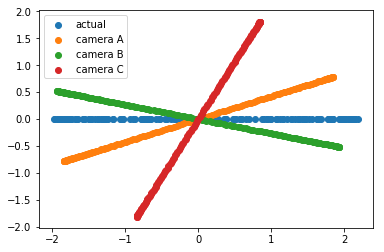

In [16]:
plt.scatter(xx_act, np.zeros_like(xx_act), label='actual')
plt.scatter(cam_A[:, 0], cam_A[:, 1], label='camera A')
plt.scatter(cam_B[:, 0], cam_B[:, 1], label='camera B')
plt.scatter(cam_C[:, 0], cam_C[:, 1], label='camera C')
plt.legend()

#### Each of the cameras is measuring the same thing from a different angle

## Instrument noise

Finally, we introduce some noise associated with the cameras ability to detect the position. 

In [17]:
noise_factor_A = .4
noise_factor_B = 1.1
noise_factor_C = .5

In [18]:
noise_A = noise_factor_A*np.random.rand(300).reshape(150,2)
noise_B = noise_factor_B*np.random.rand(300).reshape(150,2)
noise_C = noise_factor_C*np.random.rand(300).reshape(150,2)

In [19]:
cam_A_act = cam_A + noise_A
cam_B_act = cam_B + noise_B
cam_C_act = cam_C + noise_C

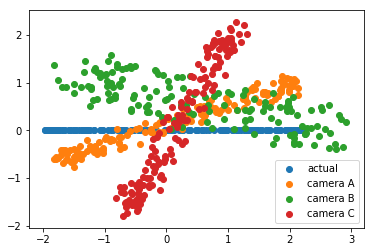

In [20]:
plt.scatter(xx_act, np.zeros_like(xx_act), label='actual')
plt.scatter(cam_A_act[:, 0], cam_A_act[:, 1], label='camera A')
plt.scatter(cam_B_act[:, 0], cam_B_act[:, 1], label='camera B')
plt.scatter(cam_C_act[:, 0], cam_C_act[:, 1], label='camera C')
plt.legend()

## Add Data to a dataframe and pickle

In [21]:
data_df = pd.DataFrame()
data_df['x_a'] = cam_A_act[:, 0]
data_df['x_b'] = cam_B_act[:, 0]
data_df['x_c'] = cam_C_act[:, 0]
data_df['y_a'] = cam_A_act[:, 1]
data_df['y_b'] = cam_B_act[:, 1]
data_df['y_c'] = cam_C_act[:, 1]

In [22]:
data_df.to_pickle('data/ball_on_spring.p')

## Serialization

#### For DataFrames
    pd.read_pickle(file_location)
    dataframe = pd.DataFrame.to_pickle(file_location)

#### For sklearn objects
As opposed to `sklearn.externals.joblib`
    sklearn.externals.joblib.dump(object, file_location)
    object = sklearn.externals.joblib.load(file_location)

#### Generally, for Python objects
    import pickle

    pickle.dump(object, file)
    object = pickle.load(file)

#### General Serialization Language Agnostic
    import json
    
    json.dump(some_dict, file)
    some_dict = json.load(file)